In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from tectosaur2.nb_config import setup
setup()
from tectosaur2 import integrate_term, refine_surfaces, gauss_rule
from tectosaur2.mesh import pts_grid
from tectosaur2.laplace2d import double_layer, hypersingular

In [17]:
t = sp.var('t')
theta = 0.5 * t * sp.pi + 0.5 * sp.pi
x = sp.cos(theta)
y = sp.sin(theta) - 0.5
#x, y = t, sp.sin((t + 1) * 2 * sp.pi)
src = refine_surfaces(
    [(t, x, y)],
    gauss_rule(12),
    max_curvature=2.0
)
src.n_pts

24

In [18]:
nobs = 300
# zoomx = [0.4, 0.9]
# zoomy = [0, 0.5]
zoomx = [-2.0, 2.0]
zoomy = [-2.0, 2.0]
xs = np.linspace(*zoomx, nobs)
ys = np.linspace(*zoomy, nobs)
obs_pts = pts_grid(xs, ys)

/Users/tbent/Dropbox/active/eq/tectosaur2/tectosaur2/integrate.py:200: UserWarning: Some integrals failed to converge during adaptive integration. This an indication of a problem in either the integration or the problem formulation.
  warnings.warn(
/Users/tbent/Dropbox/active/eq/tectosaur2/tectosaur2/integrate.py:206: UserWarning: Some expanded integrals reached maximum expansion order. These integrals may be inaccurate.
  warnings.warn(


max fail! -0.421405 0.408027 -0.773127 0.134252 1 100
exp: -0.420916 0.407125 0.00102578
max err: 8.66761e+14   tol: 1e-12
max fail! 0.421405 0.408027 0.634252 0.273127 0 100
exp: 0.420916 0.407125 0.00102578
max err: 7.81319e+14   tol: 1e-12


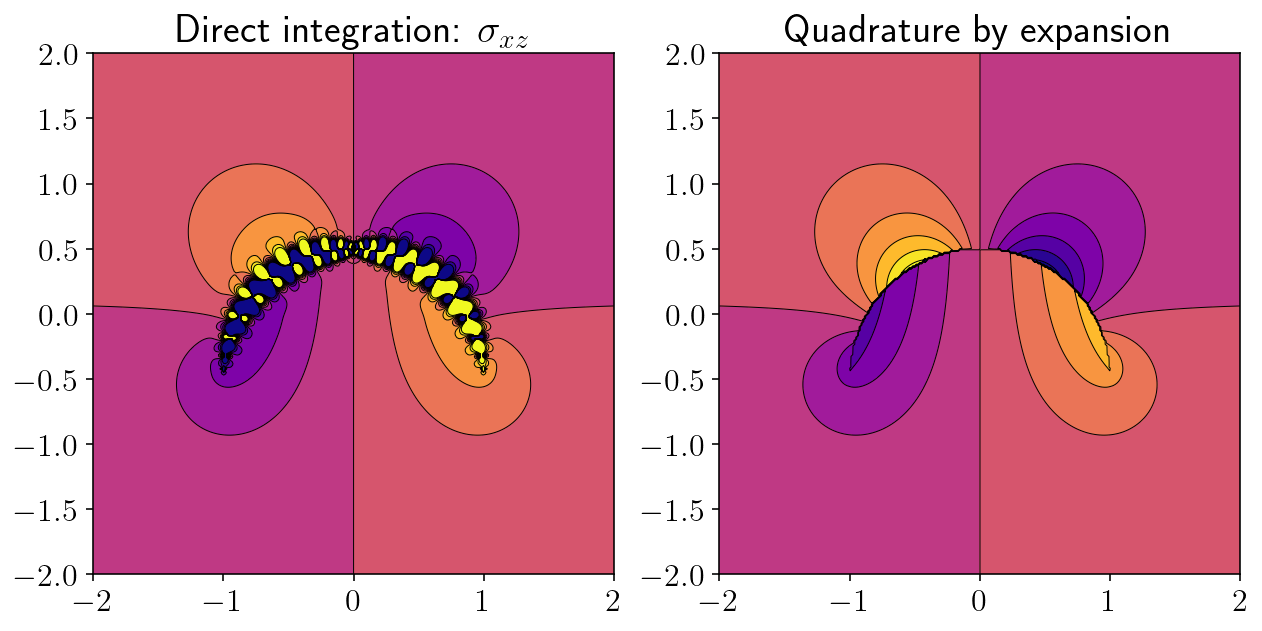

max fail! -0.421405 0.408027 -0.773127 0.134252 1 100
exp: -0.420916 0.407125 0.00102578
max err: 8.66761e+14   tol: 1e-12
max fail! 0.421405 0.408027 0.634252 0.273127 0 100
exp: 0.420916 0.407125 0.00102578
max err: 7.81319e+14   tol: 1e-12


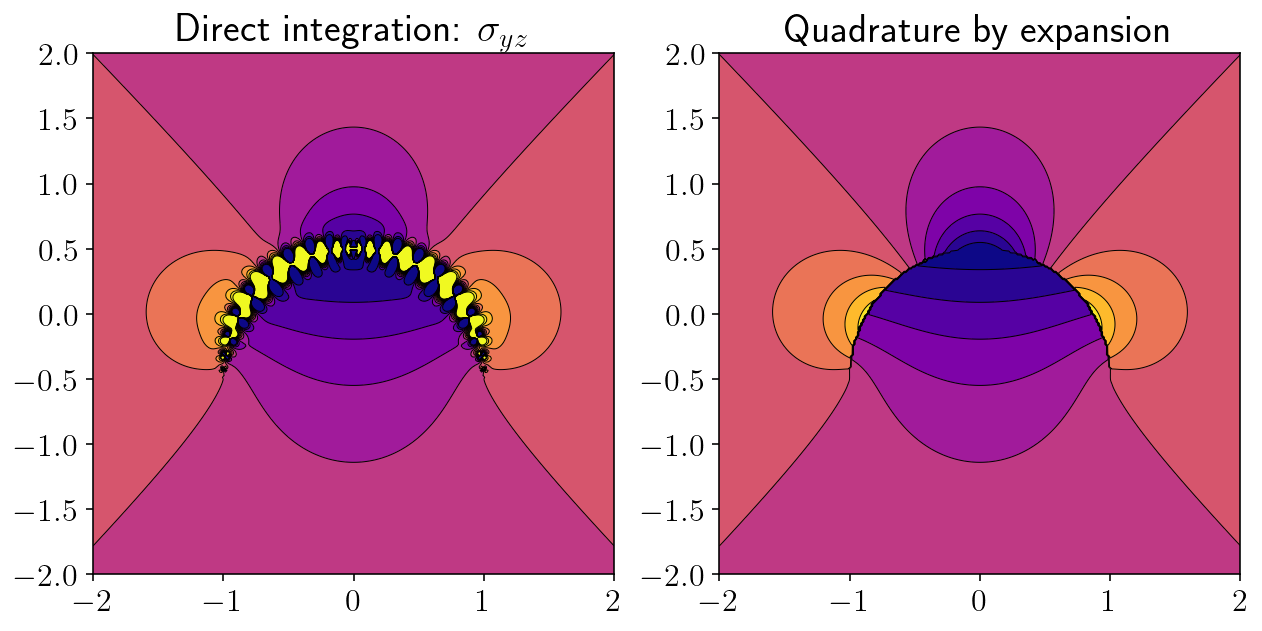

max fail! -0.421405 0.408027 -0.773127 0.134252 1 100
exp: -0.420916 0.407125 0.00102578
max err: 3.73223e+10   tol: 1e-13
max fail! 0.421405 0.408027 0.634252 0.273127 0 100
exp: 0.420916 0.407125 0.00102578
max err: 2.56184e+10   tol: 1e-13


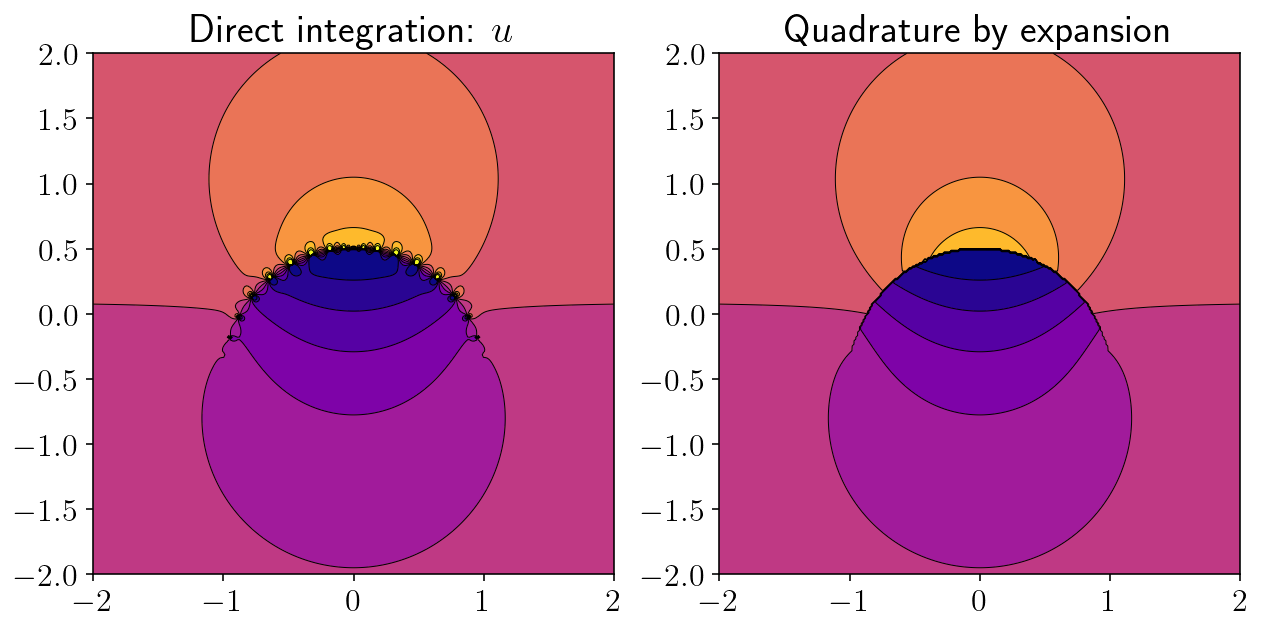

In [19]:

# plt.plot(slip)
# plt.show()
# for K in [double_layer,]
# K = double_layer
for name, latex_name, K, c in [
    ("sigma_xz", "$\sigma_{xz}$", hypersingular, 0),
    ("sigma_yz", "$\sigma_{yz}$", hypersingular, 1),
    ("disp", "$u$", double_layer, 0)
]:
    slip = np.cos(np.pi * src.quad_pts) + 1.0
    I_direct = K.direct(obs_pts, src)[:,:,:,0].dot(slip)
    M_qbx, report = integrate_term(K, obs_pts, src, return_report=True)
    # from tectosaur2.debug import plot_centers
    # plot_centers(report, zoomx, zoomy, failed=True)
    I_qbx = M_qbx[:,:,:,0].dot(slip)
    obsx = obs_pts[:,0].reshape((nobs, nobs))
    obsy = obs_pts[:,1].reshape((nobs, nobs))
    direct = I_direct[:,c].reshape((nobs, nobs))
    qbx = I_qbx[:,c].reshape((nobs, nobs))

    levels = np.linspace(-1, 1, 11)
    plt.figure(figsize=(9, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Direct integration: {latex_name}")
    cntf = plt.contourf(obsx, obsy, direct, levels=levels, extend="both")
    plt.contour(
        obsx,
        obsy,
        direct,
        colors="k",
        linestyles="-",
        linewidths=0.5,
        levels=levels,
        extend="both",
    )
    #plt.plot(src.pts[:,0], src.pts[:,1], "k-", linewidth=1.5)
    plt.xlim(zoomx)
    plt.ylim(zoomy)
    plt.axis('scaled')

    plt.subplot(1, 2, 2)
    plt.title('Quadrature by expansion')
    cntf = plt.contourf(obsx, obsy, qbx, levels=levels, extend="both")
    plt.contour(
        obsx,
        obsy,
        qbx,
        colors="k",
        linestyles="-",
        linewidths=0.5,
        levels=levels,
        extend="both",
    )
    #plt.colorbar(cntf)
    #plt.plot(src.pts[:,0], src.pts[:,1], "k-", linewidth=1.5)
    plt.axis('scaled')
    plt.xlim(zoomx)
    #plt.ylim(zoomy)
    plt.tight_layout()
    plt.savefig(f'qbx_vs_direct_{name}.png', bbox_inches="tight", pad_inches=0.01, dpi=300)
    plt.show()